In [1]:
import mokapot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading in the megascript and reformatting it

In [2]:
#read in the megaScript and reformat it
def clean_meagScript(file):
    df = pd.read_csv(file, low_memory=False,  header=[0,1])
    df.drop(columns = {"Unnamed: 0_level_0"})
    return df

Slicing out the MokaPot qvalues for MsFragger. Counting how many are at or under the cutoff

In [3]:
def get_msf_Qval_len(df, cutoff):
    msf_probability = df["MsFragger"]['mokapot q-value']
    msf_probability =  msf_probability.dropna()
    msf_under_cutoff = len(msf_probability.loc[msf_probability <= cutoff])
    return msf_under_cutoff

Slicing out the MokaPot qvalues for each tool and counting how many are at or under the cutoff

In [4]:
def get_mm_Qval_len(df, cutoff):
    mm_qval = df["MetaMorpheus"]['mokapot q-value'] 
    mm_qval =  mm_qval.dropna() 
    mm_under_cutoff = len(mm_qval.loc[mm_qval <= cutoff])
    #print(mm_qval.loc[mm_qval <= 0.01])
    return mm_under_cutoff

In [5]:
def get_msg_Qval_len(df, cutoff):
    msg_qval = df["MsgfPlus"]['mokapot q-value'] 
    msg_qval =  msg_qval.dropna() 
    msg_under_cutoff = len(msg_qval.loc[msg_qval <= cutoff])
    return msg_under_cutoff

In [6]:
def get_mq_Qval_len(df, cutoff):
    mq_PEP = df["MaxQuant"]['mokapot q-value'] 
    mq_PEP =  mq_PEP.dropna() 
    mq_under_cutoff = len(mq_PEP.loc[mq_PEP <= cutoff])
    #print(mq_PEP.loc[mq_PEP <= 0.01])
    return mq_under_cutoff

In [7]:
def get_pd_Qval_len(df, cutoff):
    pd_qval = df["Proteome_Discoverer"]['Percolator q-Value'] 
    pd_qval = pd_qval.dropna()
    pd_under_cutoff = len(pd_qval.loc[pd_qval <= cutoff])
    return pd_under_cutoff

In [8]:
def get_file_values(file, cutoff):
    df = clean_meagScript(file)
    msf_QVal = get_msf_Qval_len(df, cutoff)
    MM_QVal = get_mm_Qval_len(df, cutoff)
    msg_QVal = get_msg_Qval_len(df, cutoff)
    MQ_Qval = get_mq_Qval_len(df, cutoff)
    pd_Qval = get_pd_Qval_len(df, cutoff)
    values_list = {"msf_QVal" : msf_QVal, "MM_QVal" : MM_QVal, "msg_QVal" : msg_QVal, "MQ_Qval" : MQ_Qval, "pd_Qval" : pd_Qval}
    return values_list

Reading in the data and making the graph for the 2ng data

/Users/daishavanderwatt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


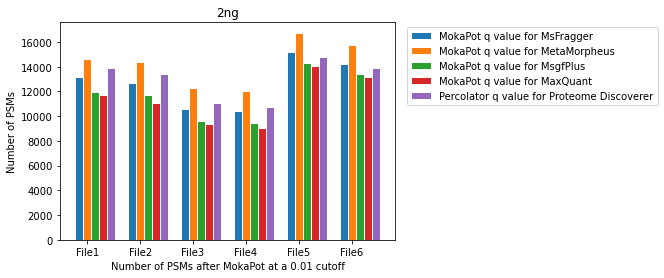

In [9]:
File1 = get_file_values("MokaPot/MegaScript_2ng_rep1.csv", 0.01)
File2 = get_file_values("MokaPot/MegaScript_2ng_rep2.csv", 0.01)
File3 = get_file_values("MokaPot/MegaScript_2ng_rep3.csv", 0.01)
File4 = get_file_values("MokaPot/MegaScript_2ng_rep4.csv", 0.01)
File5 = get_file_values("MokaPot/MegaScript_2ng_rep5.csv", 0.01)
File6 = get_file_values("MokaPot/MegaScript_2ng_rep6.csv", 0.01)

 
# set width of bars
barWidth = 0.15
 
# set heights of bars
msf_qval = [File1['msf_QVal'], File2['msf_QVal'], File3['msf_QVal'], File4['msf_QVal'], File5['msf_QVal'], File6['msf_QVal']]
MM_qval = [File1['MM_QVal'], File2['MM_QVal'], File3['MM_QVal'], File4['MM_QVal'], File5['MM_QVal'], File6['MM_QVal']]
msg_qval = [File1['msg_QVal'], File2['msg_QVal'], File3['msg_QVal'], File4['msg_QVal'], File5['msg_QVal'], File6['msg_QVal']]
mq_qval = [File1['MQ_Qval'], File2['MQ_Qval'], File3['MQ_Qval'], File4['MQ_Qval'], File5['MQ_Qval'], File6['MQ_Qval']]
pd_qval = [File1['pd_Qval'], File2['pd_Qval'], File3['pd_Qval'], File4['pd_Qval'], File5['pd_Qval'], File6['pd_Qval']]
  
# Set position of bar on X axis
r1 = np.arange(len(msf_qval))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, msf_qval, width=barWidth, edgecolor='white', label='MokaPot q value for MsFragger')
plt.bar(r2, MM_qval, width=barWidth, edgecolor='white', label='MokaPot q value for MetaMorpheus')
plt.bar(r3, msg_qval, width=barWidth, edgecolor='white', label='MokaPot q value for MsgfPlus')
plt.bar(r4, mq_qval, width=barWidth, edgecolor='white', label='MokaPot q value for MaxQuant')
plt.bar(r5, pd_qval, width=barWidth, edgecolor='white', label='Percolator q value for Proteome Discoverer')
 
# Add xticks on the middle of the group bars
plt.ylabel('Number of PSMs')
plt.xlabel('Number of PSMs after MokaPot at a 0.01 cutoff')
plt.title('2ng')
plt.xticks([r + barWidth for r in range(len(msf_qval))], ['File1', 'File2', 'File3', 'File4', 'File5', 'File6'])
 
# Create legend & Show graphic
plt.legend(loc = "upper right", bbox_to_anchor=(1.8, 1))
figure2_1 = plt.gcf()
figure2_1.savefig('2ng_PSM_after_MP.png', dpi=300, bbox_inches='tight')
plt.show()

This graph shows the number of PSMs with a MokaPot qvalue  at or below a specific cutoff after a tool's output has been ran through MokaPot. This showcases the data for the 2ng files. 

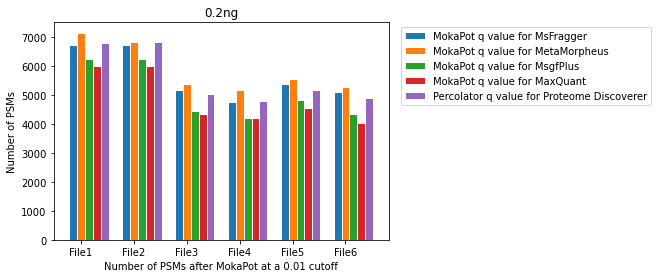

In [10]:
File1 = get_file_values("MokaPot/MegaScript_0.2ng_rep1.csv", 0.01)
File2 = get_file_values("MokaPot/MegaScript_0.2ng_rep2.csv", 0.01)
File3 = get_file_values("MokaPot/MegaScript_0.2ng_rep3.csv", 0.01)
File4 = get_file_values("MokaPot/MegaScript_0.2ng_rep4.csv", 0.01)
File5 = get_file_values("MokaPot/MegaScript_0.2ng_rep5.csv", 0.01)
File6 = get_file_values("MokaPot/MegaScript_0.2ng_rep6.csv", 0.01)

 
# set width of bars
barWidth = 0.15
 
# set heights of bars
msf_qval = [File1['msf_QVal'], File2['msf_QVal'], File3['msf_QVal'], File4['msf_QVal'], File5['msf_QVal'], File6['msf_QVal']]
MM_qval = [File1['MM_QVal'], File2['MM_QVal'], File3['MM_QVal'], File4['MM_QVal'], File5['MM_QVal'], File6['MM_QVal']]
msg_qval = [File1['msg_QVal'], File2['msg_QVal'], File3['msg_QVal'], File4['msg_QVal'], File5['msg_QVal'], File6['msg_QVal']]
mq_qval = [File1['MQ_Qval'], File2['MQ_Qval'], File3['MQ_Qval'], File4['MQ_Qval'], File5['MQ_Qval'], File6['MQ_Qval']]
pd_qval = [File1['pd_Qval'], File2['pd_Qval'], File3['pd_Qval'], File4['pd_Qval'], File5['pd_Qval'], File6['pd_Qval']] 
    
# Set position of bar on X axis
r1 = np.arange(len(msf_qval))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, msf_qval, width=barWidth, edgecolor='white', label='MokaPot q value for MsFragger')
plt.bar(r2, MM_qval, width=barWidth, edgecolor='white', label='MokaPot q value for MetaMorpheus')
plt.bar(r3, msg_qval, width=barWidth, edgecolor='white', label='MokaPot q value for MsgfPlus')
plt.bar(r4, mq_qval, width=barWidth, edgecolor='white', label='MokaPot q value for MaxQuant')
plt.bar(r5, pd_qval, width=barWidth, edgecolor='white', label='Percolator q value for Proteome Discoverer')

 
# Add xticks on the middle of the group bars
plt.ylabel('Number of PSMs')
plt.xlabel('Number of PSMs after MokaPot at a 0.01 cutoff')
plt.title('0.2ng')
plt.xticks([r + barWidth for r in range(len(msf_qval))], ['File1', 'File2', 'File3', 'File4', 'File5', 'File6'])
 
# Create legend & Show graphic
plt.legend(loc = "upper right", bbox_to_anchor=(1.8, 1))
figure2_2 = plt.gcf()
figure2_2.savefig('0.2ng_PSM_after_MP.png', dpi=300, bbox_inches='tight')
plt.show()

This graph shows the number of PSMs with a MokaPot qvalue  at or below a specific cutoff after a tool's output has been ran through MokaPot. Proteome Discoverer automatically runs its data through Percolator, so it's output is the percolator q value. 
This showcases the data for the 0.2ng files.

In [11]:
x = get_file_values("MokaPot/MegaScript_2ng_rep5.csv" ,0.01)
print(x['pd_Qval'])

14796
